In [1]:
!pip install graphviz
!pip install pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import graphviz 
import pydotplus
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from chefboost import Chefboost as chef 
from c45 import C45
from sklearn.tree import plot_tree
from pydotplus import graph_from_dot_data
from sklearn import tree

#讀取資料集
df_read = pd.read_csv('adult.csv')

df = df_read.copy()
#補?值 以資料裡最常出現的值為值
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')
df = df.drop(['education','fnlwgt'],axis=1)

#標籤化
df['marital-status'] = LabelEncoder().fit_transform(df['marital-status'])
df['relationship'] = LabelEncoder().fit_transform(df['relationship'])
df['occupation'] = LabelEncoder().fit_transform(df['occupation'])
df['race'] = LabelEncoder().fit_transform(df['race'])
df['native-country'] = LabelEncoder().fit_transform(df['native-country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])
#有序編碼
workclass_map = {'Never-worked':0,'Without-pay':1,'Private':2,
                 'Self-emp-not-inc':3,'Local-gov':4,'State-gov':5,
                 'Federal-gov':6,'Self-emp-inc':7}
income_map = {'<=50K':0,'>50K':1}
df['workclass'] = df['workclass'].map(workclass_map)
df['income'] = df['income'].map(income_map)



#標準化
scaler_x = StandardScaler().fit(df.drop(['income'],axis=1))
X = scaler_x.transform(df.drop(['income'],axis=1))
y = df['income']

#切割資料集為訓練集&測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

#決策樹分類器
Dtree = DecisionTreeClassifier(criterion='gini', max_depth=10 , max_leaf_nodes=200,random_state=42)


model_Dtree = Dtree.fit(X_train, y_train) 
pred_Dtree = Dtree.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(model_Dtree.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_Dtree.score(X_test, y_test)))
print(classification_report(y_test,pred_Dtree))
report_Dtree=classification_report(y_test, pred_Dtree,output_dict=True)
data_Dtree = pd.DataFrame(report_Dtree).transpose()
writer = pd.ExcelWriter('report.xlsx')
data_Dtree.to_excel(writer, sheet_name='Dtree')

Accuracy on training data: 0.866
Accuracy on test data: 0.863
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12316
           1       0.78      0.59      0.67      3802

    accuracy                           0.86     16118
   macro avg       0.83      0.77      0.79     16118
weighted avg       0.86      0.86      0.86     16118



In [2]:
c45 =df.copy()
c45 = C45()
model_c45 = c45.fit(X_train,y_train)
pred_c45 =  c45.predict(X_test)
print("Accuracy on training data: {:,.3f}".format(model_c45.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_c45.score(X_test, y_test)))
print(classification_report(y_test,pred_c45))
report_c45=classification_report(y_test, pred_c45,output_dict=True)
data_c45 = pd.DataFrame(report_c45).transpose()
data_c45.to_excel(writer, sheet_name='C45')

Accuracy on training data: 0.975
Accuracy on test data: 0.831
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12316
           1       0.64      0.64      0.64      3802

    accuracy                           0.83     16118
   macro avg       0.77      0.76      0.76     16118
weighted avg       0.83      0.83      0.83     16118



In [3]:
#C5.0
c50 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=200,random_state=42)
model_c50 = c50.fit(X_train,y_train)
pred_c50 = c50.predict(X_test)
print("Accuracy on training data: {:,.3f}".format(model_c50.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_c50.score(X_test, y_test)))
print(classification_report(y_test,pred_c50))
report_c50=classification_report(y_test, pred_c50,output_dict=True)
data_c50 = pd.DataFrame(report_c50).transpose()
data_c50.to_excel(writer, sheet_name='C50')

Accuracy on training data: 0.868
Accuracy on test data: 0.865
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12316
           1       0.78      0.60      0.68      3802

    accuracy                           0.87     16118
   macro avg       0.83      0.77      0.80     16118
weighted avg       0.86      0.87      0.86     16118



In [4]:
#CART
cart = DecisionTreeClassifier(criterion='gini',random_state=42)
model_cart = cart.fit(X_train,y_train)
pred_cart = cart.predict(X_test)
print("Accuracy on training data: {:,.3f}".format(model_cart.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_cart.score(X_test, y_test)))
print(classification_report(y_test,pred_cart))
report_cart=classification_report(y_test, pred_cart,output_dict=True)
data_cart = pd.DataFrame(report_cart).transpose()
data_cart.to_excel(writer, sheet_name='CART')
writer.close()

Accuracy on training data: 0.975
Accuracy on test data: 0.825
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12316
           1       0.63      0.63      0.63      3802

    accuracy                           0.82     16118
   macro avg       0.76      0.76      0.76     16118
weighted avg       0.82      0.82      0.82     16118



In [5]:
#ID3
config_ID3 = {'algorithm': 'ID3'}
model_ID3 = chef.fit(df, config = config_ID3, target_label = 'income')


[INFO]:  8 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  80.79320859909058  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.15334479887528493
MSE:  0.1528158825054939
RMSE:  0.39091672067781125
RAE:  0.7991520990806379
RRSE:  0.9162574763279118
Mean:  0.23928176569346055
MAE / Mean:  64.08545107099056 %
RMSE / Mean:  163.3708776533384 %


In [6]:
#選定CART 比較參數
test_cart = DecisionTreeClassifier(criterion='gini',random_state=42)
test1_cart = DecisionTreeClassifier(criterion='gini', max_depth=6 , max_leaf_nodes=100,random_state=42)
test2_cart = DecisionTreeClassifier(criterion='gini', max_depth=5 , max_leaf_nodes=100,random_state=42)
test3_cart = DecisionTreeClassifier(criterion='gini', max_depth=6 , max_leaf_nodes=10,random_state=42)

model_test = test_cart.fit(X_train,y_train)
pred_test = test_cart.predict(X_test)

model_test1 = test1_cart.fit(X_train,y_train)
pred_test1 = test1_cart.predict(X_test)

model_test2 = test2_cart.fit(X_train,y_train)
pred_test2 = test2_cart.predict(X_test)

model_test3 = test3_cart.fit(X_train,y_train)
pred_test3 = test3_cart.predict(X_test)

print("------test--------")
print("Accuracy on training data: {:,.3f}".format(model_test.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_test.score(X_test, y_test)))
print("------test1--------")
print("Accuracy on training data: {:,.3f}".format(model_test1.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_test1.score(X_test, y_test)))
print("------test2--------")
print("Accuracy on training data: {:,.3f}".format(model_test2.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_test2.score(X_test, y_test)))
print("------test3--------")
print("Accuracy on training data: {:,.3f}".format(model_test3.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(model_test3.score(X_test, y_test)))

------test--------
Accuracy on training data: 0.975
Accuracy on test data: 0.825
------test1--------
Accuracy on training data: 0.854
Accuracy on test data: 0.860
------test2--------
Accuracy on training data: 0.850
Accuracy on test data: 0.857
------test3--------
Accuracy on training data: 0.842
Accuracy on test data: 0.849


True

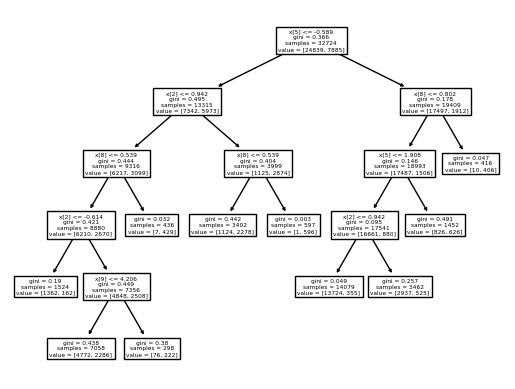

In [7]:
#畫決策樹匯出pdf
tree.plot_tree(test1_cart);
test1_dot_data = tree.export_graphviz(test1_cart, out_file = None)
test1_graph = pydotplus.graph_from_dot_data(test1_dot_data)
test1_graph.write_pdf('test1Tree.pdf')

tree.plot_tree(test2_cart);
test2_dot_data = tree.export_graphviz(test2_cart, out_file = None)
test2_graph = pydotplus.graph_from_dot_data(test2_dot_data)
test2_graph.write_pdf('test2Tree.pdf')

tree.plot_tree(test3_cart);
test3_dot_data = tree.export_graphviz(test3_cart, out_file = None)
test3_graph = pydotplus.graph_from_dot_data(test3_dot_data)
test3_graph.write_pdf('test3Tree.pdf')
